## Challenge 1 - Regression
There is a target variable in the dataset regression.zip called Price. Please create a model that predicts Price given a set of observed regressors.

In [169]:
# Necessary imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [170]:
df_orig = pd.read_csv('challenge1.csv')

In [171]:
df_orig.head(20)

,loc1,loc2,para1,dow,para2,para3,para4,price
0,0,01,1,Mon,662,3000.0,3.8,73.49
1,9,99,1,Thu,340,2760.0,9.2,300.00
2,0,04,0,Mon,16,2700.0,3.0,130.00
3,4,40,1,Mon,17,12320.0,6.4,365.00
4,5,50,1,Thu,610,2117.0,10.8,357.50
5,0,03,1,Tue,483,1899.0,13.6,550.00
6,0,09,1,Mon,214,1000.0,3.0,210.00
7,7,74,1,Wed,452,330.0,3.0,366.67
8,8,89,1,Tue,130,8000.0,4.5,193.33
9,1,17,4,Fri,1004,3135.0,13.2,1400.00


In [172]:
df_orig.shape

(10000, 8)

In [173]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
loc1     10000 non-null object
loc2     10000 non-null object
para1    10000 non-null int64
dow      10000 non-null object
para2    10000 non-null int64
para3    10000 non-null float64
para4    10000 non-null float64
price    10000 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


In [174]:
# Make a copy to manipulate
df = df_orig.copy()

In [175]:
df.head()

,loc1,loc2,para1,dow,para2,para3,para4,price
0,0,01,1,Mon,662,3000.0,3.8,73.49
1,9,99,1,Thu,340,2760.0,9.2,300.00
2,0,04,0,Mon,16,2700.0,3.0,130.00
3,4,40,1,Mon,17,12320.0,6.4,365.00
4,5,50,1,Thu,610,2117.0,10.8,357.50


## EDA

### Histograms

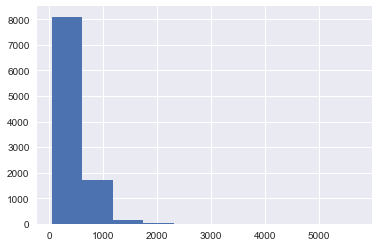

In [176]:
df.price.hist()

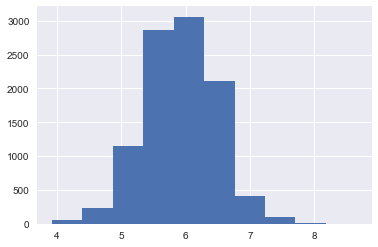

In [177]:
# Distribution is skewed left - try taking the log and see what happens
df['logprice'] = np.log(df.price)
df.logprice.hist()

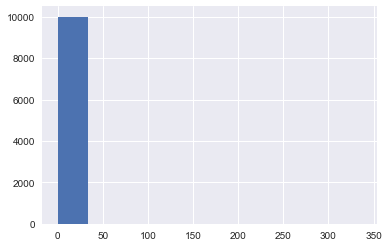

In [178]:
df.para1.hist()

In [179]:
# There seems to be one outlier with para1 - maybe ignore?
df.para1.value_counts()

1      7052
3      1613
0       836
2       268
4       164
5        51
6         6
7         3
13        2
9         2
337       1
24        1
8         1
Name: para1, dtype: int64

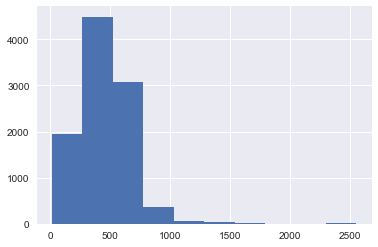

In [180]:
df.para2.hist()

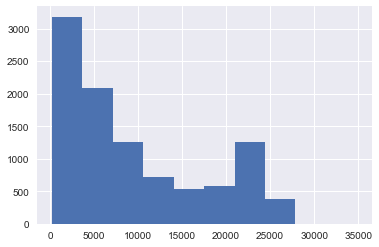

In [181]:
df.para3.hist()

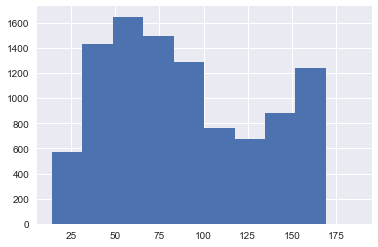

In [182]:
(np.sqrt(df.para3).hist())

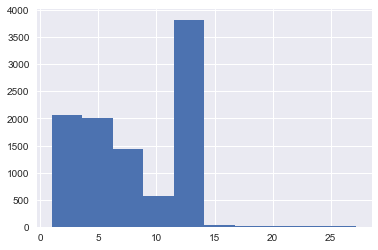

In [183]:
df.para4.hist()

In [184]:
loc1_sorted = sorted(df['loc1'].unique())
loc1_sorted

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'S', 'T']

In [185]:
loc2_sorted = (sorted(df['loc2'].unique())) # 107 items
loc2_sorted

['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '0B',
 '0C',
 '0L',
 '0N',
 '0T',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 'S6',
 'TS']

In [186]:
sorted(df['para1'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 13, 24, 337]

In [187]:
len(df.para2.unique())

1016

In [188]:
len(df.para3.unique())

4359

In [189]:
len(df.para4.unique())

243

In [190]:
(df['dow'].unique())

array(['Mon', 'Thu', 'Tue', 'Wed', 'Fri', 'Sat', 'Sun'], dtype=object)

### Create categorical and ordinal variables for DOW and loc1 and loc2

In [192]:
# Convert Days of Week to Ordinal Variable

df['dow_ord'] = df.dow # new column for ordinal days of week
df.head()

,loc1,loc2,para1,dow,para2,para3,para4,price,logprice,dow_ord
0,0,01,1,Mon,662,3000.0,3.8,73.49,4.297149,Mon
1,9,99,1,Thu,340,2760.0,9.2,300.00,5.703782,Thu
2,0,04,0,Mon,16,2700.0,3.0,130.00,4.867534,Mon
3,4,40,1,Mon,17,12320.0,6.4,365.00,5.899897,Mon
4,5,50,1,Thu,610,2117.0,10.8,357.50,5.879135,Thu


In [193]:
df.dow_ord = df.dow_ord.astype('category')
df.dow_ord = df.dow_ord.cat.reorder_categories(['Mon', 'Tue', 'Wed','Thu','Fri','Sat','Sun'], ordered=True)
df.dow_ord = df.dow_ord.cat.codes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
loc1        10000 non-null object
loc2        10000 non-null object
para1       10000 non-null int64
dow         10000 non-null object
para2       10000 non-null int64
para3       10000 non-null float64
para4       10000 non-null float64
price       10000 non-null float64
logprice    10000 non-null float64
dow_ord     10000 non-null int8
dtypes: float64(4), int64(2), int8(1), object(3)
memory usage: 713.0+ KB


In [194]:
# Convert Days of Week to Categorical Variables
dow_cat = patsy.dmatrix('dow',data=df,return_type='dataframe')
dow_cat.head()

,Intercept,dow[T.Mon],dow[T.Sat],dow[T.Sun],dow[T.Thu],dow[T.Tue],dow[T.Wed]
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [195]:
# Convert loc1 and loc2 to ordinal varibles
df['loc1_ord'] = df.loc1
df['loc2_ord'] = df.loc2

df.loc1_ord = df.loc1_ord.astype('category')
df.loc1_ord = df.loc1_ord.cat.reorder_categories(loc1_sorted, ordered=True)
df.loc1_ord = df.loc1_ord.cat.codes

df.loc2_ord = df.loc2_ord.astype('category')
df.loc2_ord = df.loc2_ord.cat.reorder_categories(loc2_sorted, ordered=True)
df.loc2_ord = df.loc2_ord.cat.codes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
loc1        10000 non-null object
loc2        10000 non-null object
para1       10000 non-null int64
dow         10000 non-null object
para2       10000 non-null int64
para3       10000 non-null float64
para4       10000 non-null float64
price       10000 non-null float64
logprice    10000 non-null float64
dow_ord     10000 non-null int8
loc1_ord    10000 non-null int8
loc2_ord    10000 non-null int8
dtypes: float64(4), int64(2), int8(3), object(3)
memory usage: 732.5+ KB


In [196]:
# Convert loc1 and loc2 to categorical variables
loc1_cat = patsy.dmatrix('loc1',data=df,return_type='dataframe')
loc1_cat.head()

,Intercept,loc1[T.1],loc1[T.2],loc1[T.3],loc1[T.4],loc1[T.5],loc1[T.6],loc1[T.7],loc1[T.8],loc1[T.9],loc1[T.S],loc1[T.T]
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
loc2_cat = patsy.dmatrix('loc2',data=df,return_type='dataframe')
loc2_cat.head()

,Intercept,loc2[T.01],loc2[T.02],loc2[T.03],loc2[T.04],loc2[T.05],loc2[T.06],loc2[T.07],loc2[T.08],loc2[T.09],...,loc2[T.92],loc2[T.93],loc2[T.94],loc2[T.95],loc2[T.96],loc2[T.97],loc2[T.98],loc2[T.99],loc2[T.S6],loc2[T.TS]
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Check Correlations

In [198]:
# check correlation
df_corr = df.corr()
df_corr

,para1,para2,para3,para4,price,logprice,dow_ord,loc1_ord,loc2_ord
para1,1.000000,0.072025,0.010420,0.001663,0.074754,0.059204,0.129038,0.011520,0.011106
para2,0.072025,1.000000,0.006978,0.020806,0.552681,0.491363,0.003857,0.061850,0.058469
para3,0.010420,0.006978,1.000000,0.691237,0.355088,0.428493,-0.045833,-0.123508,-0.115762
para4,0.001663,0.020806,0.691237,1.000000,0.514990,0.612797,-0.034891,-0.124780,-0.120444
price,0.074754,0.552681,0.355088,0.514990,1.000000,0.892028,-0.002249,-0.045341,-0.046813
logprice,0.059204,0.491363,0.428493,0.612797,0.892028,1.000000,-0.010095,-0.030491,-0.033708
dow_ord,0.129038,0.003857,-0.045833,-0.034891,-0.002249,-0.010095,1.000000,0.033301,0.035247
loc1_ord,0.011520,0.061850,-0.123508,-0.124780,-0.045341,-0.030491,0.033301,1.000000,0.994976
loc2_ord,0.011106,0.058469,-0.115762,-0.120444,-0.046813,-0.033708,0.035247,0.994976,1.000000


In [199]:
df_corr.price

para1       0.074754
para2       0.552681
para3       0.355088
para4       0.514990
price       1.000000
logprice    0.892028
dow_ord    -0.002249
loc1_ord   -0.045341
loc2_ord   -0.046813
Name: price, dtype: float64

In [200]:
df_corr.logprice

para1       0.059204
para2       0.491363
para3       0.428493
para4       0.612797
price       0.892028
logprice    1.000000
dow_ord    -0.010095
loc1_ord   -0.030491
loc2_ord   -0.033708
Name: logprice, dtype: float64

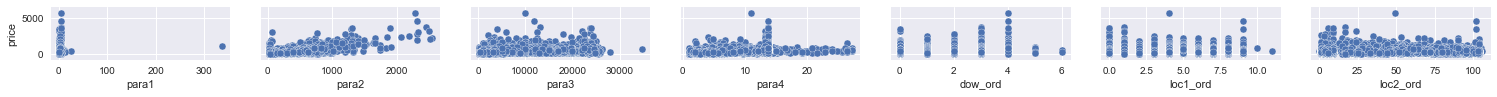

In [201]:
# price
sns.pairplot(df, 
             x_vars=['para1', 'para2', 'para3', 'para4', 'dow_ord', 'loc1_ord', 'loc2_ord'],
             y_vars =['price'], 
             size = 1.5, aspect=2)

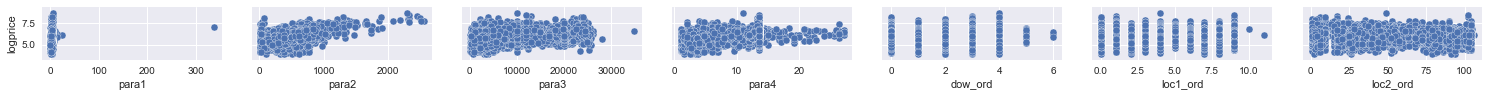

In [202]:
# logprice
sns.pairplot(df, 
             x_vars=['para1', 'para2', 'para3', 'para4', 'dow_ord', 'loc1_ord', 'loc2_ord'],
             y_vars =['logprice'], 
             size = 1.5, aspect=2)

## Linear Regression

### LR with untransformed variables

In [203]:
# Just continuous features

# Define the model
lm1 = smf.ols('price ~ para1 + para2 + para3 + para4', data=df)
# Fit the model
fit1 = lm1.fit()
# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     3184.
Date:                Wed, 28 Mar 2018   Prob (F-statistic):               0.00
Time:                        14:28:38   Log-Likelihood:                -66336.
No. Observations:               10000   AIC:                         1.327e+05
Df Residuals:                    9995   BIC:                         1.327e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -129.3392      5.326    -24.283      0.000    -139.780    -118.898
para1          2.7732      0.527      5.262      0.000       1.740       3.806
para2          0.6775      0.008     81.140      0.000       0.661       0.694
para3          0.0002      0.000      0.580      0.562      -0.000       0.001
para4         30.0691      0.552     54.462      0.000      28.987      31.151
==============================================================================
Omnibus:                     9015.690   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           966713.355
Skew:                           3.904   Prob(JB):                         0.00
Kurtosis:                      50.531   Cond. No.                     3.62e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [204]:
# Continuous and ordinal variables

# Define the model
lm2 = smf.ols('price ~ para1 + para2 + para3 + para4 + dow_ord + loc1_ord + loc2_ord', data=df)
# Fit the model
fit2 = lm2.fit()
# Print summary statistics of the model's performance
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     1824.
Date:                Wed, 28 Mar 2018   Prob (F-statistic):               0.00
Time:                        14:28:39   Log-Likelihood:                -66328.
No. Observations:               10000   AIC:                         1.327e+05
Df Residuals:                    9992   BIC:                         1.327e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -114.2167      7.760    -14.720      0.000    -129.427     -99.006
para1          2.6777      0.531      5.041      0.000       1.636       3.719
para2          0.6782      0.008     81.064      0.000       0.662       0.695
para3          0.0002      0.000      0.682      0.495      -0.000       0.001
para4         29.9690      0.553     54.225      0.000      28.886      31.052
dow_ord        1.9785      1.332      1.485      0.138      -0.633       4.590
loc1_ord      16.9064      6.376      2.652      0.008       4.408      29.404
loc2_ord      -1.7726      0.608     -2.918      0.004      -2.964      -0.582
==============================================================================
Omnibus:                     9010.513   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           965403.312
Skew:                           3.900   Prob(JB):                         0.00
Kurtosis:                      50.499   Cond. No.                     5.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### With logprice

In [205]:
# Continuous and ordinal variables

# Define the model
lm3 = smf.ols('logprice ~ para1 + para2 + para3 + para4 + dow_ord + loc1_ord + loc2_ord', data=df)
# Fit the model
fit3 = lm3.fit()
# Print summary statistics of the model's performance
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     2209.
Date:                Wed, 28 Mar 2018   Prob (F-statistic):               0.00
Time:                        14:28:40   Log-Likelihood:                -3613.7
No. Observations:               10000   AIC:                             7243.
Df Residuals:                    9992   BIC:                             7301.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8010      0.015    327.453      0.000       4.772       4.830
para1          0.0036      0.001      3.555      0.000       0.002       0.006
para2          0.0012   1.58e-05     75.366      0.000       0.001       0.001
para3       1.444e-06   6.02e-07      2.399      0.016    2.64e-07    2.62e-06
para4          0.0712      0.001     68.149      0.000       0.069       0.073
dow_ord        0.0028      0.003      1.129      0.259      -0.002       0.008
loc1_ord       0.0842      0.012      6.987      0.000       0.061       0.108
loc2_ord      -0.0078      0.001     -6.772      0.000      -0.010      -0.006
==============================================================================
Omnibus:                      612.241   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2377.580
Skew:                          -0.183   Prob(JB):                         0.00
Kurtosis:                       5.360   Cond. No.                     5.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [206]:
# So far, just looking at p-values and coefficients: para3 and dow_ord seem insignificant, but logprice seems to work well

# Define the model
lm4 = smf.ols('logprice ~ para1 + para2 + para4 + loc1_ord + loc2_ord', data=df)
# Fit the model
fit4 = lm4.fit()
# Print summary statistics of the model's performance
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     3090.
Date:                Wed, 28 Mar 2018   Prob (F-statistic):               0.00
Time:                        14:28:41   Log-Likelihood:                -3617.2
No. Observations:               10000   AIC:                             7246.
Df Residuals:                    9994   BIC:                             7290.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8050      0.014    346.757      0.000       4.778       4.832
para1          0.0037      0.001      3.766      0.000       0.002       0.006
para2          0.0012   1.58e-05     75.329      0.000       0.001       0.001
para4          0.0729      0.001     95.852      0.000       0.071       0.074
loc1_ord       0.0819      0.012      6.817      0.000       0.058       0.105
loc2_ord      -0.0076      0.001     -6.608      0.000      -0.010      -0.005
==============================================================================
Omnibus:                      622.370   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2432.124
Skew:                          -0.190   Prob(JB):                         0.00
Kurtosis:                       5.386   Cond. No.                     2.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

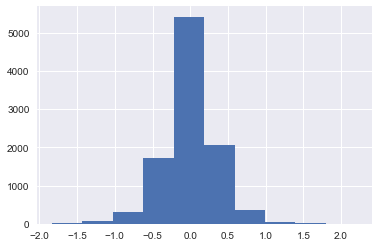

In [207]:
# Check residuals

fit4.resid.hist()

## MVP

### MVP DF

In [208]:
df_mvp = df[['logprice', 'para1','para2','para3','para4','loc1_ord','loc2_ord']]
df_mvp.head()

,logprice,para1,para2,para3,para4,loc1_ord,loc2_ord
0,4.297149,1,662,3000.0,3.8,0,1
1,5.703782,1,340,2760.0,9.2,9,104
2,4.867534,0,16,2700.0,3.0,0,4
3,5.899897,1,17,12320.0,6.4,4,45
4,5.879135,1,610,2117.0,10.8,5,55


In [211]:
# use dow_cat (days of week as categorical variables) instead of ordinal variable
df_mvp = df_mvp.join(dow_cat).drop('Intercept',axis=1)

In [212]:
# drop outlier from para1
df_mvp = df_mvp[df_mvp.para1 < 300]
df_mvp['para1'].unique()

array([ 1,  0,  4,  3,  2,  5, 24,  7,  6, 13,  9,  8])

In [214]:
df_mvp.columns

Index(['logprice', 'para1', 'para2', 'para3', 'para4', 'loc1_ord', 'loc2_ord',
       'dow[T.Mon]', 'dow[T.Sat]', 'dow[T.Sun]', 'dow[T.Thu]', 'dow[T.Tue]',
       'dow[T.Wed]'],
      dtype='object')

### MVP with all features

In [216]:
# quick check of new dataframe and features
import statsmodels.api as sm

y = df_mvp.logprice
x = df_mvp.drop(['logprice'],1)

lm5 = sm.OLS(y,x)
fit5 = lm5.fit()
fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 3.398e+04
Date:                Wed, 28 Mar 2018   Prob (F-statistic):               0.00
Time:                        14:39:01   Log-Likelihood:                -13341.
No. Observations:                9999   AIC:                         2.671e+04
Df Residuals:                    9987   BIC:                         2.679e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
para1          0.7447      0.011     69.800      0.000       0.724       0.766
para2          0.0018   4.34e-05     42.141      0.000       0.002       0.002
para3      -4.479e-06   1.59e-06     -2.815      0.005    -7.6e-06   -1.36e-06
para4          0.1436      0.003     54.113      0.000       0.138       0.149
loc1_ord      -1.1107      0.029    -38.095      0.000      -1.168      -1.054
loc2_ord       0.1140      0.003     41.637      0.000       0.109       0.119
dow[T.Mon]     2.0793      0.030     69.411      0.000       2.021       2.138
dow[T.Sat]     1.0935      0.292      3.750      0.000       0.522       1.665
dow[T.Sun]     2.3239      0.531      4.374      0.000       1.283       3.365
dow[T.Thu]     1.9935      0.029     68.206      0.000       1.936       2.051
dow[T.Tue]     2.0853      0.030     69.959      0.000       2.027       2.144
dow[T.Wed]     2.0550      0.029     71.718      0.000       1.999       2.111
==============================================================================
Omnibus:                     2332.393   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56802.017
Skew:                          -0.545   Prob(JB):                         0.00
Kurtosis:                      14.625   Cond. No.                     7.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### MVP with Train Test Split

In [219]:
# create train-test split with scikit-learn (to test observations later too)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3, 
                                                    random_state=0)

In [221]:
from sklearn.linear_model import LinearRegression
# Create an empty model
lr = LinearRegression()

# Fit model to training set
lr.fit(X_train, y_train)

print('Train R2', lr.score(X_train, y_train)) # the R^2 of the model on the whole training set
print('Test R2', lr.score(X_test, y_test)) # the R^2 of the model for the predicted values of the test set against the actual y_test

Train R2 0.611028409524
Test R2 0.60333135419


In [224]:
lr.intercept_

4.76514616182049

In [225]:
lr.coef_

array([  2.97321965e-02,   1.16342434e-03,   1.65796744e-06,
         7.13695157e-02,   8.45170322e-02,  -7.87369676e-03,
         2.38631315e-02,   1.27848564e-01,   3.04251421e-01,
         2.29159760e-02,   3.35633824e-02,   1.35622194e-02])

In [227]:
yhat = lr.predict(X_test)

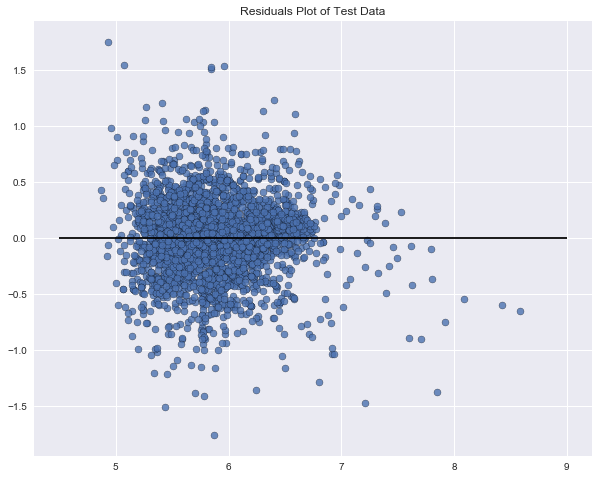

In [241]:
# Check Residuals

plt.figure(figsize=(10,8))
resids = y_test-yhat
plt.scatter(yhat, resids, alpha=.8, edgecolors='k')
plt.hlines(0,xmin=4.5, xmax=9)
plt.title('Residuals Plot of Test Data')

In [223]:
# Cross validation
from sklearn.model_selection import cross_val_score

# Perform 3-fold cross validation with

lrcv = LinearRegression()
scores = cross_val_score(lrcv, X_train, y_train, 
                         cv=3)

print(scores)
print(scores.mean())

# not much difference with averaging

[ 0.60891671  0.6079507   0.60648058]
0.607782661904


## Future Directions

### MVP with Polynomial Regression

### More feature engineering/Regularization
* see which features are actually most important
* see if there are different relationships between the target and the features